## Lab report 2 by Nesrine Benchoubane - 1945866

with 3D-DAOSTORM

In this example, we're analyzing a simulated dataset that is 2D, so we'll use the 2D fixed PSF model in 3D-DAOSTORM.

### Download the dataset from the 2013 SMLM challenge website

The dataset we'll use is [here](http://bigwww.epfl.ch/smlm/challenge2013/datasets/Bundled_Tubes_High_Density/index.html). This is the "Bundled Tubes High Density" dataset.

You'll need to download the "sequence.zip" file to the above directory and the unzip it. Look for the "Download all frames" button.

### Read the data from Aquired STORM

In [21]:
import tifffile
import os

file_name = "lab-data/Aquired STORM_LAST200.tif"
saved_file = "lab-data/Aquired STORM_LAST200_LOC.hdf5"

im = tifffile.imread(file_name)

# Delete any stale results.
if os.path.exists(saved_file):
    os.remove(saved_file)


### Create an XML file for analysis

In [24]:

import storm_analysis.sa_library.parameters as parameters

params = parameters.ParametersDAO()

# Analyze the whole movie.
params.changeAttr("max_frame", 5)
params.changeAttr("start_frame", 1)

params.changeAttr("background_sigma", 11.0)

# These were specified on the website for this dataset.
params.changeAttr("camera_gain", 1.0)
params.changeAttr("camera_offset", 100.0)

# Since this parameter can be either a float or an int we need
# to specify which type we want it to be.
params.changeAttr("find_max_radius", 5, node_type = "float")

params.changeAttr("foreground_sigma", 1.0)
params.changeAttr("iterations", 20)
params.changeAttr("model", "2dfixed")
params.changeAttr("pixel_size", 100.0)
params.changeAttr("roi_size", 11)

# Convert from FWHM in nanometers to sigma in pixels.
params.changeAttr("sigma", 258.21/(100.0 * 2.355))
params.changeAttr("threshold", 6)

# Don't do tracking.
params.changeAttr("radius", "0.0")
params.changeAttr("descriptor", "1")

# Don't do drift-correction.
params.changeAttr("drift_correction", 0)

params.toXMLFile("analysis.xml", pretty = True)


### Analyze the data

In [25]:
import storm_analysis.daostorm_3d.mufit_analysis as mfit
    
%time mfit.analyze(file_name, saved_file, "analysis.xml")


version 2020.07.01

Peak finding
Frame: 1 1384 1384
Frame: 2 1374 2758
Frame: 3 1293 4051
Frame: 4 1317 5368

Added 5368
   73 peak finding iterations.

   0 fits reset due to Cholesky failure.
   0 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   7 fits reset due to negative height.
   43196 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   0 fits were lost.
   12 peaks lost to proximity filter.
   312 peaks lost to low significance.
   418211 fitting iterations.

Tracking.

Checking z values.

Analysis complete
Wall time: 6.18 s


Reference results:

```
Added 46437
   4705 peak finding iterations.

   0 fits reset due to Cholesky failure.
   14 fits reset due to image margin.
   677 fits reset due to negative value in fit function.
   110 fits reset due to negative height.
   533925 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   17 fits were lost.
   415 peaks lost to proximity filter.
   244 peaks lost to low significance.
   6706925 fitting iterations.

Tracking.

Checking z values.

Analysis complete
CPU times: user 55.5 s, sys: 486 ms, total: 56 s
Wall time: 55.4 s
```

Results may vary slightly. In particular the FFTW library is not completely deterministic when run with `FFTW_MEASURE`.

### Check analysis of a single frame

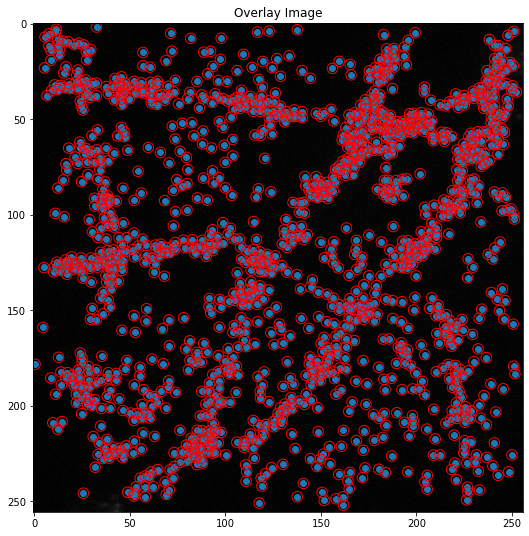

In [17]:
import storm_analysis.jupyter_examples.overlay_image as overlay_image

frame_number = 1
overlay_image.overlayImage(file_name, saved_file, frame_number)


### Create an image of the analysis

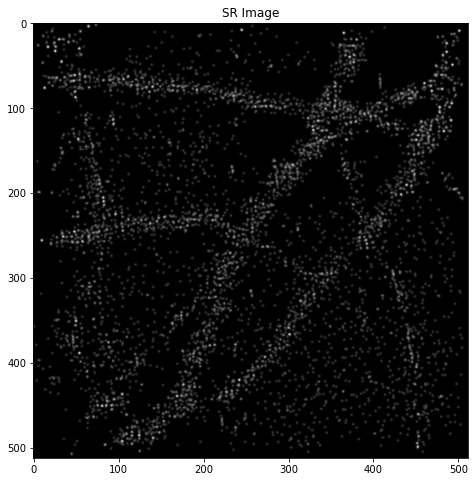

In [26]:
import matplotlib
import matplotlib.pyplot as pyplot

import storm_analysis.sa_utilities.hdf5_to_image as h5_image

sr_im = h5_image.render2DImage(saved_file, scale = 2, sigma = 1)

pyplot.figure(figsize = (8, 8))
pyplot.imshow(sr_im, cmap = "gray")
pyplot.title("SR Image")
pyplot.show()


In [16]:
sr_im

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])